## Introduction to Causal Inference and Directed Acyclic Graphs (DAGs)

Welcome to this explorative journey into the world of Causal Inference, an essential realm of study that sits at the intersection of statistics, philosophy, and ethics. This notebook, inspired by insights from the comprehensive textbook "Causal Inference," is designed to be an enlightening guide through the intricacies of understanding and interpreting causal relationships. 

### What You Will Learn

In this course, you will unravel the complex yet fascinating concepts of causality, discover the power of Directed Acyclic Graphs (DAGs) in unveiling causal structures, and dive into advanced topics that bridge theory with practical application. From the foundational principles of causality to the nuanced aspects of ethical considerations in research, this notebook is your pathway to gaining a holistic understanding of how causal inferences can be drawn and applied in various fields, particularly using the Infant Health and Development Program (IHDP) dataset as a practical case study.

### Why Causal Inference Matters

In a world inundated with data, the ability to distinguish correlation from causation is not just a statistical skill but a critical tool for making informed decisions. Whether it's in medicine, social science, or policy-making, understanding the cause-and-effect relationships helps in crafting effective interventions and policies that can significantly impact society. Through this course, you will learn not just the 'how' but also the 'why' behind causal inference, equipped with the knowledge to question, analyze, and apply these concepts responsibly.

### Navigating Through the Notebook

As you progress through this notebook, you will encounter a blend of theoretical discussions, Python code examples, that aim to solidify your understanding of causal inference. Each section builds upon the last, ensuring a comprehensive learning experience that is both challenging and rewarding. 

Get ready to embark on this intellectual adventure that promises to deepen your understanding of causality and equip you with the tools to apply this knowledge in the real world. Let's begin our journey into the realm of causal discovery and its implications!


So, grab your data detective hat and let's dive into the captivating world of causal inference

# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ihdp_data= pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x"+str(i))
ihdp_data.columns = col
ihdp_data = data.astype({"treatment":'bool'}, copy=False)
ihdp_data.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


We have successfully loaded the IHDP dataset into a pandas DataFrame. From data.head(), here's a quick rundown of what we can infer about the columns:

- treatment: A binary indicator (True/False) showing whether the individual received the treatment or not.
- y_factual: The actual outcome observed for each individual.
- y_cfactual: The counterfactual outcome, which is what would have happened to each individual had they received the opposite treatment.
- mu0 and mu1: These might represent the expected outcome if the individual did not receive the treatment (mu0) and if they did (mu1).
- x1 to x24: These appear to be covariates or features that describe each individual. The values seem standardized, which is common for datasets used in causal inference to prevent scale issues in analysis.

Preliminary Analysis

In [6]:
print("Dataset Summary:")
print(ihdp_data.info())



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   treatment   747 non-null    bool   
 1   y_factual   747 non-null    float64
 2   y_cfactual  747 non-null    float64
 3   mu0         747 non-null    float64
 4   mu1         747 non-null    float64
 5   x1          747 non-null    float64
 6   x2          747 non-null    float64
 7   x3          747 non-null    float64
 8   x4          747 non-null    float64
 9   x5          747 non-null    float64
 10  x6          747 non-null    float64
 11  x7          747 non-null    int64  
 12  x8          747 non-null    int64  
 13  x9          747 non-null    int64  
 14  x10         747 non-null    int64  
 15  x11         747 non-null    int64  
 16  x12         747 non-null    int64  
 17  x13         747 non-null    int64  
 18  x14         747 non-null    int64  
 19  x15         

In [7]:
# Show basic statistical details
print("\nBasic Statistical Details:")
print(ihdp_data.describe())



Basic Statistical Details:
        y_factual  y_cfactual         mu0         mu1            x1  \
count  747.000000  747.000000  747.000000  747.000000  7.470000e+02   
mean     3.159538    5.696107    2.432513    6.448580  2.853585e-17   
std      2.179956    1.980121    1.281515    0.454766  1.000000e+00   
min     -1.543902   -1.037628    0.924453    5.591647 -2.731287e+00   
25%      1.626779    5.053598    1.518409    6.087863 -6.669461e-01   
50%      2.577294    6.209686    2.114661    6.419095  1.652752e-01   
75%      4.494637    6.948922    2.989305    6.765241  8.137593e-01   
max     11.268228   10.171004    9.821792    7.954804  1.505476e+00   

                 x2            x3            x4            x5            x6  \
count  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02   
mean  -9.511951e-18 -2.853585e-17 -5.849850e-16  2.853585e-17 -7.466881e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.800823e

In [8]:
# Check for any missing values
print("\nMissing Values Check:")
print(ihdp_data.isnull().sum())



Missing Values Check:
treatment     0
y_factual     0
y_cfactual    0
mu0           0
mu1           0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
dtype: int64


In [9]:
# Count the distribution of the treatment variable
print("\nTreatment Distribution:")
print(ihdp_data['treatment'].value_counts(normalize=True))  # The normalize parameter will give us proportions


Treatment Distribution:
treatment
False    0.813922
True     0.186078
Name: proportion, dtype: float64


The above code calculated the proportion of individuals in the IHDP dataset that received treatment versus those who did not. Based on the output:

Approximately 18.61% of individuals in the dataset received the treatment.
The remaining 81.39% did not receive the treatment.

From this treatment distribution, we can infer the following:

- Imbalance in Treatment Assignment: There's an imbalance in the dataset with a greater number of individuals not receiving the treatment. This is typical in observational studies and can pose challenges for causal inference because the treatment group may differ systematically from the control group.

- Need for Balance: When using this dataset to estimate causal effects, we may need to use statistical techniques that account for this imbalance, such as propensity score matching, weighting, or stratification, to make fair comparisons between treated and untreated individuals.


Visualizing the Distribution of Some Covariates:


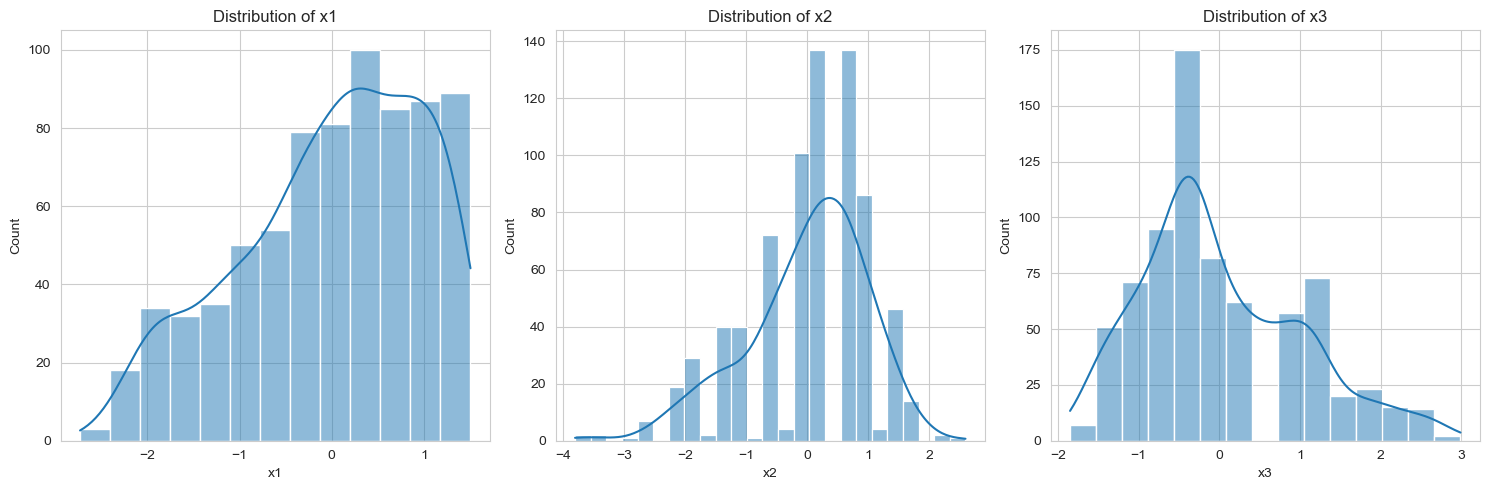

In [10]:
# To get a feel for the continuous covariates, we will visualize their distributions

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distributions of the first few covariates as an example
print("\nVisualizing the Distribution of Some Covariates:")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['x1', 'x2', 'x3']):
    sns.histplot(ihdp_data[col], ax=axes[i], kde=True).set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Here's what we can infer from each of them:

- Distribution of x1: The histogram for x1 looks approximately normally distributed. This suggests that x1 could represent a standardized metric or a variable that naturally follows a bell curve within the population.

- Distribution of x2: The distribution of x2 is quite interesting. It seems to have multiple peaks (multimodal distribution). This could indicate that x2 represents a categorical variable that has been encoded or a continuous variable that reflects different subpopulations or behaviors in the data.

- Distribution of x3: x3 appears to have a distribution that somewhat resembles a normal distribution but is skewed to the right (positive skew). This skewness indicates that there are more observations with lower values of x3 and fewer as the values increase.

<b>Implications for Causal Inference:</b>

- Normality of Covariates (x1): If covariates are normally distributed, they may lend themselves to parametric statistical methods that assume normality. However, causal inference techniques do not strictly require normality.

- Multimodality (x2): If x2 represents a categorical variable, the analysis should account for the different categories possibly by using stratification or modeling them as distinct groups.

- Skewness (x3): Skewness in covariates can sometimes indicate the presence of outliers or a long tail in one direction. It's important to consider whether the skewness reflects the natural distribution of the variable or if it indicates potential data quality issues.

Overall, understanding the distribution of covariates is essential in causal analysis because:

They are used to adjust for confounding and must be accurately measured and appropriately handled in the analysis.
Their distribution can affect the assumptions and the performance of statistical models used in causal inference.
Anomalies or peculiarities in their distribution can provide insights into the structure of the data and guide further data cleaning or preprocessing steps.








# Directed Acyclic Graphs (DAGs) in Causal Inference

## Introduction to DAGs

Directed Acyclic Graphs (DAGs) are a pivotal concept in causal inference, offering a visual and mathematical approach to understanding and elucidating causal relationships. A DAG is a graphical representation consisting of nodes, which represent variables, and edges (arrows), which denote directional causal effects between these variables.

The 'Acyclic' nature of these graphs means that they do not contain any cycles; that is, there is no path that starts and ends at the same node while following the direction of the arrows. This property is crucial in causal inference since it represents the non-reciprocal nature of causal effects — in other words, causality does not loop back on itself.

DAGs serve multiple purposes in the realm of causal analysis:
- **Structural Understanding**: They help researchers conceptualize and communicate the structure of causal systems.
- **Identification of Confounding**: They play a key role in identifying potential confounders that must be controlled for to estimate causal effects accurately.
- **Assumption Clarification**: The assumptions about causal relationships are made explicit in a DAG, making it easier to discuss and critique them.
- **Guidance for Analysis**: They guide the analytical choices in statistical models used for causal inference.

In the subsequent sections of this chapter, we will delve deeper into the components of DAGs, their construction, and interpretation. We will also explore how to apply DAGs in the context of the IHDP dataset, using Python to illustrate and analyze the causal relationships within the data.


## Fundamental Concepts of DAGs

### Nodes and Edges

In Directed Acyclic Graphs (DAGs), the primary elements are **nodes** and **edges**:

- **Nodes** (also known as vertices) represent variables in our analysis. These could include individual characteristics, environmental factors, or any variables of interest.
- **Edges** (or arrows) indicate direct causal influence. An edge pointing from node A to node B implies that A has a causal effect on B.

It is crucial to note that edges imply a *hypothesized* causal direction which is based on prior knowledge, theory, or empirical evidence.

Next, we'll look at how these concepts translate into a simple DAG using Python's graphing libraries.


### Application: Constructing a Simple DAG
Let's apply our understanding by constructing a straightforward DAG. We will illustrate a simple causal relationship between two variables using Python's `networkx` library. In our hypothetical example:

- Node A represents an individual's birth weight.
- Node B represents cognitive development later in life.

The DAG will help us visualize the proposed causal impact of birth weight (A) on cognitive development (B).

Executing the Python code below will render our simple DAG:

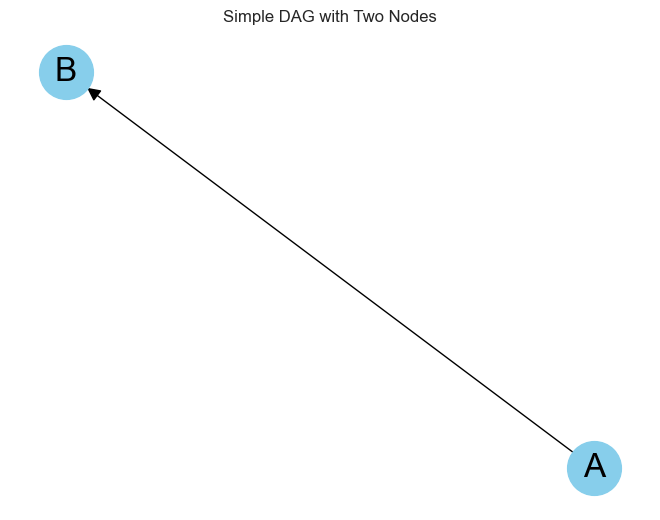

In [16]:
# Import the networkx library
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing variables. For example, A could be birth weight, and B could be cognitive development.
G.add_nodes_from(['A', 'B'])

# Add edges representing causal directions
G.add_edge('A', 'B')  # A causes B

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=24, arrowstyle='-|>', arrowsize=20)
plt.title('Simple DAG with Two Nodes')
plt.show()


Now we have introduced the basics and provided a simple application. We will continue to build on this foundation, adding complexity and guiding through more intricate examples with the IHDP dataset. 

### Confounding Variables

A **confounding variable** is one that affects both the treatment and the outcome. It's a third variable that is not part of the causal pathway from the independent variable (treatment) to the dependent variable (outcome) but is associated with both. This relationship can lead to a spurious association if not properly controlled.

In DAGs, confounders are depicted as nodes that have arrows pointing to both the treatment and outcome nodes. This visualization helps to identify variables that must be adjusted for in the causal analysis to obtain an unbiased estimate of the treatment effect.


### Application: DAG with a Confounder

Building upon our simple DAG, we now introduce a confounding variable to the scenario:

- Node C represents a confounding variable, such as socio-economic status.
- It affects both birth weight (Node A) and cognitive development (Node B).

The DAG will demonstrate how socio-economic status (C) can potentially influence both the treatment (A) and the outcome (B), illustrating the concept of confounding.

By executing the code snippet below, we will see how the confounding variable fits into the causal structure:


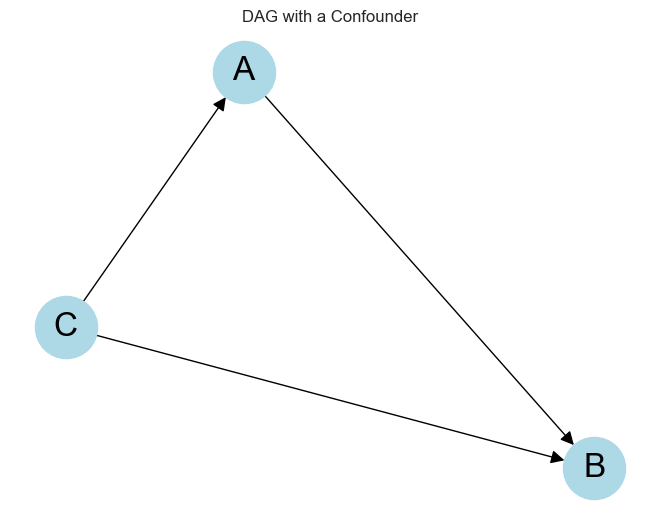

In [17]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes representing variables. For example, A could be birth weight, and B could be cognitive development.
G.add_nodes_from(['A', 'B'])

# Add edges representing causal directions
G.add_edge('A', 'B')  # A causes B

# Adding a confounder to our graph
G.add_node('C')  # C represents a confounding variable, e.g., socio-economic status

# Adding edges to show that C is a confounder affecting both A and B
G.add_edge('C', 'A')  # C causes A
G.add_edge('C', 'B')  # C also causes B

# Redrawing the graph with the added confounder
pos = nx.spring_layout(G)  # Recalculate positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=24, arrowstyle='-|>', arrowsize=20)
plt.title('DAG with a Confounder')
plt.show()

### Mediators and Interaction Effects
#### Mediators

A **mediator** is an intermediate variable through which a treatment exerts its effect on the outcome. It helps explain the 'how' or 'why' behind the effect. In a DAG, mediators are depicted as nodes along the causal path from the treatment to the outcome.

#### Interaction Effects

An **interaction effect** occurs when the effect of one independent variable on the outcome is changed by the presence or level of another independent variable. In a DAG, this is usually represented by an additional node that is connected to the variables it interacts with and the outcome.

### Application: DAG with a Mediator and an Interaction Effect

To add more complexity, we introduce a mediator and an interaction effect to our DAG:

- Node M represents a mediator variable, such as health behaviors that are influenced by birth weight (A) and in turn affect cognitive development (B).
- Node I represents an interaction effect, indicating that the relationship between birth weight (A) and cognitive development (B) is modified by socio-economic status (C).

With the addition of these new elements, our DAG becomes a more comprehensive model that not only shows direct causal relationships but also incorporates the complexity of mediation and interaction.

The code below will visualize this more complex causal structure:


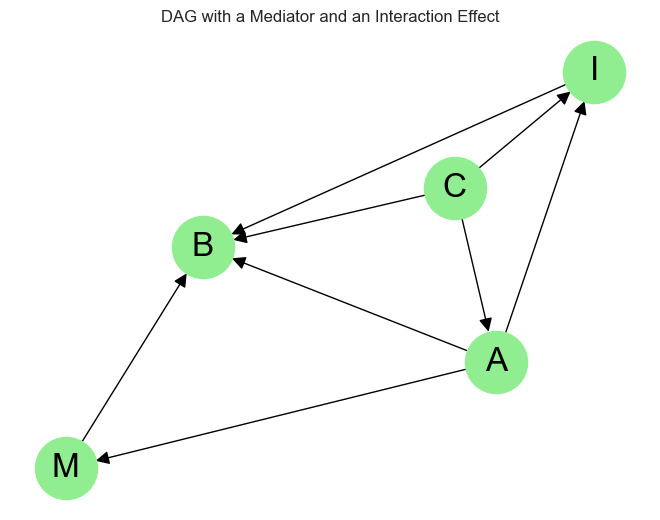

In [18]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes representing variables. For example, A could be birth weight, and B could be cognitive development.
G.add_nodes_from(['A', 'B'])

# Add edges representing causal directions
G.add_edge('A', 'B')  # A causes B

# Adding a confounder to our graph
G.add_node('C')  # C represents a confounding variable, e.g., socio-economic status

# Adding edges to show that C is a confounder affecting both A and B
G.add_edge('C', 'A')  # C causes A
G.add_edge('C', 'B')  # C also causes B

# Adding a mediator to the graph
G.add_node('M')  # M represents a mediator, e.g., health behaviors
G.add_edge('A', 'M')  # A causes M
G.add_edge('M', 'B')  # M causes B, mediating the effect of A on B

# Adding an interaction effect node
G.add_node('I')  # I represents an interaction, e.g., A's effect on B is modified by I
G.add_edge('I', 'B')  # Interaction effect on B

# Drawing an edge from A and C to I, representing interaction effect
G.add_edge('A', 'I')  # A contributes to I
G.add_edge('C', 'I')  # C contributes to I

# Redrawing the graph with the added mediator and interaction effect
pos = nx.spring_layout(G)  # Recalculate positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=24, arrowstyle='-|>', arrowsize=20)
plt.title('DAG with a Mediator and an Interaction Effect')
plt.show()

## Applying DAGs to the IHDP Dataset

Now, we will apply the concepts of DAGs to our IHDP dataset. Considering the dataset variables and the relationships derived from the study, we hypothesize the following:

- The **Treatment** variable indicates whether children received the intervention.
- The **Outcome** is the cognitive test score.
- **Confounders** such as socio-economic indicators influence both the likelihood of receiving treatment and the outcome.
- A **Mediator** may represent aspects of the post-treatment environment that affect the outcome.
- An **Interaction Effect** could represent how the treatment effect is modified by certain characteristics like baseline health status.

In the code cell below, we create a DAG reflecting these relationships. The nodes represent variables from our dataset, and the edges depict the hypothesized causal paths based on our understanding of the study and the variables involved.

This visual representation will guide our further causal analysis, allowing us to plan our statistical approach to control for confounding, measure mediation effects, and explore interaction effects.


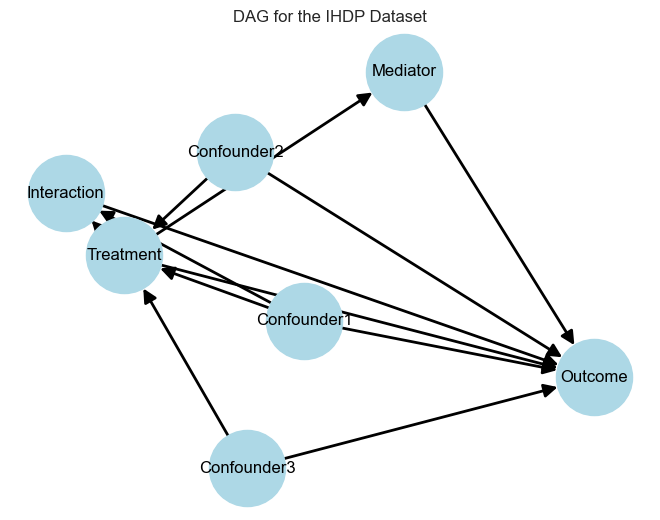

In [19]:
# Import the necessary library
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G_ihdp = nx.DiGraph()

# Add nodes for treatment, outcome, confounders, mediator, and interaction effect
G_ihdp.add_node('Treatment')
G_ihdp.add_node('Outcome')
G_ihdp.add_nodes_from(['Confounder1', 'Confounder2', 'Confounder3', 'Mediator', 'Interaction'])

# Add edges based on our assumptions
G_ihdp.add_edge('Treatment', 'Outcome')
G_ihdp.add_edge('Mediator', 'Outcome')
G_ihdp.add_edge('Treatment', 'Mediator')
G_ihdp.add_edges_from([('Confounder1', 'Treatment'), ('Confounder1', 'Outcome'),
                        ('Confounder2', 'Treatment'), ('Confounder2', 'Outcome'),
                        ('Confounder3', 'Treatment'), ('Confounder3', 'Outcome'),
                        ('Interaction', 'Outcome'), ('Treatment', 'Interaction'),
                        ('Confounder1', 'Interaction')]) # Assuming Confounder1 interacts with the treatment

# Draw the graph
pos = nx.layout.spring_layout(G_ihdp)
nx.draw(G_ihdp, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20, width=2,
        arrowstyle='-|>', font_size=12)

# Display the graph
plt.title('DAG for the IHDP Dataset')
plt.show()


This is a hypothetical example of how one might construct a DAG based on the variables in the IHDP dataset. It is essential to understand the specifics of the variables and the study design to create an accurate DAG for any real-world dataset. Once we have the DAG, we can proceed with causal analysis, using methods such as adjustment formulas, propensity score matching, or instrumental variables, which will rely on the structure of the DAG.

## Adjustment for Confounding

When conducting causal inference, it's crucial to account for confounding variables. These are factors that are correlated with both the treatment and the outcome, which can lead to biased estimations of the treatment effect. To address this issue, we employ methods that adjust for confounding variables.

One powerful method is based on the **propensity score**, which is the probability of an individual receiving the treatment given their observed characteristics. The propensity score balances the distribution of observed characteristics between the treated and control groups, mimicking the conditions of a randomized experiment.

The propensity score is typically estimated using a logistic regression model, where the predictors are the confounders identified in our DAG. Once we have the propensity scores, we can use them in several ways to adjust for confounders, including matching, stratification, or weighting.

The formula for calculating the propensity score using logistic regression is as follows:

\[ \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k \]

where \( p \) is the propensity score and \( X_1, X_2, \ldots, X_k \) represent the confounding variables.


To apply the propensity score technique to the IHDP dataset, we will use logistic regression to estimate the propensity score for each individual. We'll assume that the variables x1 to x3 are the confounders based on the DAG we conceptualized.

Here's the step-by-step process we will follow in code:

1. Estimate propensity scores using logistic regression.
2. Check the balance of covariates before and after propensity score matching.
3. Match the treatment and control groups based on the propensity scores.
4. Compare the outcome (y_factual) between the matched groups to estimate the causal effect.

#### Step 1: Estimate Propensity Scores

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV


# Selecting the confounder variables for the propensity score model
confounders = ihdp_data[['x1', 'x2', 'x3']]

# Treatment assignment
treatment = ihdp_data['treatment'].astype(int)  # Making sure it's an integer

# Fit a logistic regression model for the propensity scores
logistic_regression_model = LogisticRegression()
calibrated_lr = CalibratedClassifierCV(logistic_regression_model)  # This will give us probability scores
calibrated_lr.fit(confounders, treatment)

# Predicting the propensity scores
ihdp_data['propensity_score'] = calibrated_lr.predict_proba(confounders)[:, 1]


#### Step 2 and 3: Check Balance and Match Groups

We will use the propensity_score to match individuals. There are various matching techniques, but we'll start with a simple nearest neighbor matching without replacement. Libraries like causalml or PyMatch can be used, but for simplicity, we'll do a basic implementation using sklearn.

In [21]:
from sklearn.neighbors import NearestNeighbors

# Create two datasets for treated and untreated subjects
treated = ihdp_data[ihdp_data['treatment'] == True]
control = ihdp_data[ihdp_data['treatment'] == False]

# Use NearestNeighbors to find matches for the treated subjects
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Create a DataFrame for matched pairs
matched_pairs = treated.assign(match=control.iloc[indices.flatten()].index).reset_index()

# Checking the balance (optional): One way is to look at the mean of the confounders in both groups
print("Balance Check:")
print(matched_pairs[['x1', 'x2', 'x3']].mean() - control[['x1', 'x2', 'x3']].mean())


Balance Check:
x1    0.258106
x2    0.224562
x3   -0.055031
dtype: float64


#### Step 4: Compare Outcomes Between Matched Groups

In [22]:
# Calculating the Average Treatment Effect on the Treated (ATT)
att = matched_pairs['y_factual'].mean() - control.loc[matched_pairs['match'], 'y_factual'].mean()

print(f"Estimated Average Treatment Effect on the Treated (ATT): {att}")


Estimated Average Treatment Effect on the Treated (ATT): 3.9715226355710183


The Estimated Average Treatment Effect on the Treated (ATT) is a measure used in causal inference to quantify the effect of a treatment or intervention. The ATT specifically measures the difference in the expected outcome for those who received the treatment versus what their outcome would have been if they had not received the treatment.

Your calculated ATT of approximately 3.97 suggests the following interpretation:

**Treatment Impact:** On average, individuals who received the treatment have an outcome that is higher by about 3.97 units than what it would have been if they had not received the treatment. If we're talking about the IHDP dataset, where the outcome is typically a measure of cognitive development, an ATT of 3.97 could be considered a significant positive effect of the treatment on cognitive test scores.

**Policy Implications:** This result can be influential in decision-making contexts. If the treatment is an early childhood intervention program, the positive ATT indicates that the program is effective in improving cognitive outcomes for treated children.

**Causal Inference Strength:** The strength of this causal inference depends on how well the propensity score matching controlled for confounding variables. If the matching was successful in balancing all the relevant confounders between treated and control groups, we can have more confidence that the observed effect is indeed causal.

**Not the Average Effect:** It’s important to note that the ATT is not the average effect of the treatment across all individuals, but rather the average effect on those who actually received the treatment. This distinction matters if the treatment group is not representative of the entire population.

**Further Analysis:** While the ATT provides a point estimate of the treatment's effect, it does not tell us about the variability or uncertainty around this estimate. Typically, one would also look at confidence intervals or conduct hypothesis tests to assess the statistical significance of the estimated effect.

**Contextual Understanding:** Finally, the interpretation of the ATT must consider the context and domain specifics. A 3.97 point increase in cognitive test scores needs to be evaluated against what is considered a clinically or educationally meaningful difference.

**In summary, the ATT you've calculated indicates a beneficial effect of the treatment within the IHDP dataset, with the caveat that the validity of this effect depends on the appropriateness of the propensity score model and the quality of the matching process. Further diagnostic checks and statistical tests would be necessary to confirm the robustness of this result.**

## Advanced DAG Concepts

Expanding upon our foundational understanding of Directed Acyclic Graphs (DAGs), we now turn our attention to more nuanced aspects. These advanced concepts help in untangling complex causal mechanisms and are crucial for robust causal inference.

### Colliders

A **collider** is a variable that is causally influenced by two or more other variables in the DAG. The key characteristic of a collider is that conditioning on it (i.e., controlling or adjusting for it in your analysis) can introduce bias, known as collider bias.

- **Example**: If smoking causes lung cancer and also causes yellow teeth, lung cancer and yellow teeth are colliders with respect to smoking.
- **Significance**: Identifying colliders is crucial because adjusting for them can open up paths of spurious association, leading to incorrect causal inferences.



**Example: Consider a scenario with three variables: Smoking (S), Lung Cancer (L), and Yellow Teeth (Y). Smoking causes Lung Cancer and Yellow Teeth, making Y a collider.**

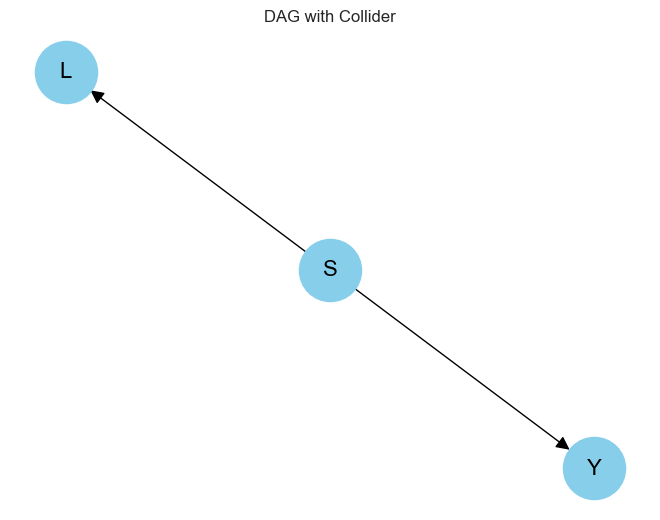

In [23]:
# Importing necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
G_collider = nx.DiGraph()

# Adding nodes
G_collider.add_nodes_from(['S', 'L', 'Y'])

# Adding edges to create a collider structure
G_collider.add_edge('S', 'L')
G_collider.add_edge('S', 'Y')

# Drawing the graph
nx.draw(G_collider, with_labels=True, node_color='skyblue', arrowsize=20, node_size=2000, font_size=16)
plt.title('DAG with Collider')
plt.show()


### Back-door Criterion

The **back-door criterion** is a set of rules used to identify if a set of variables can appropriately adjust for confounding in a causal diagram. It essentially checks if blocking all back-door paths (paths from the outcome to the treatment that go against the direction of the arrows) would stop confounding.

- **Procedure**: To apply this criterion, identify all back-door paths from the treatment to the outcome and ensure the set of variables blocks these paths without opening new paths (like through colliders).
- **Application**: This criterion is pivotal in selecting the right set of covariates for controlling confounding in regression models.



**Example: Assume Age (A) affects both Exercise (E) and Heart Health (H). Here, A is a confounder. We must control for A to estimate the causal effect of E on H.**

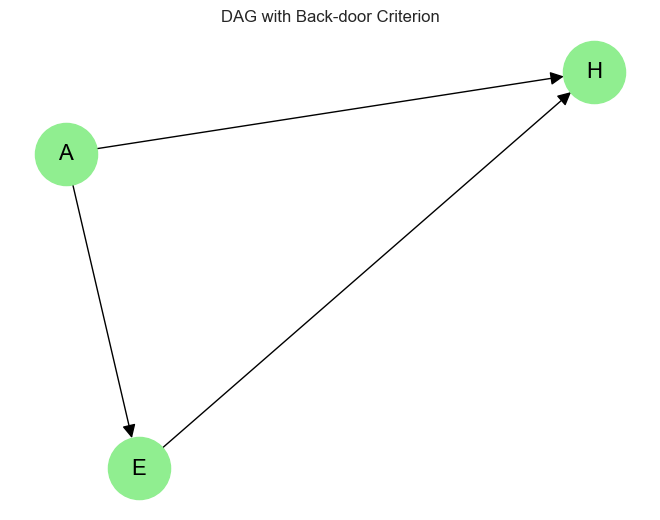

In [25]:
# Creating a directed graph for back-door criterion
G_backdoor = nx.DiGraph()

# Adding nodes
G_backdoor.add_nodes_from(['A', 'E', 'H'])

# Adding edges
G_backdoor.add_edge('E', 'H')
G_backdoor.add_edge('A', 'E')
G_backdoor.add_edge('A', 'H')

# Drawing the graph
nx.draw(G_backdoor, with_labels=True, node_color='lightgreen', arrowsize=20, node_size=2000, font_size=16)
plt.title('DAG with Back-door Criterion')
plt.show()


### Front-door Criterion

The **front-door criterion** is another method to identify causal effects, especially useful when no set of variables satisfies the back-door criterion, typically in the presence of unmeasured confounding.

- **Concept**: It involves identifying a mediating variable through which the causal effect is transmitted from the treatment to the outcome. 
- **Requirement**: The mediator should capture all the direct effects of the treatment and should not be affected by unmeasured confounding.
- **Advantage**: This approach is powerful when direct measurement of all confounders is not possible.

**Example: If Exercise (E) affects Health Habits (Hb), which in turn affects Heart Health (H), and assuming no unmeasured confounding between Hb and H, we can use Hb as a front-door.**




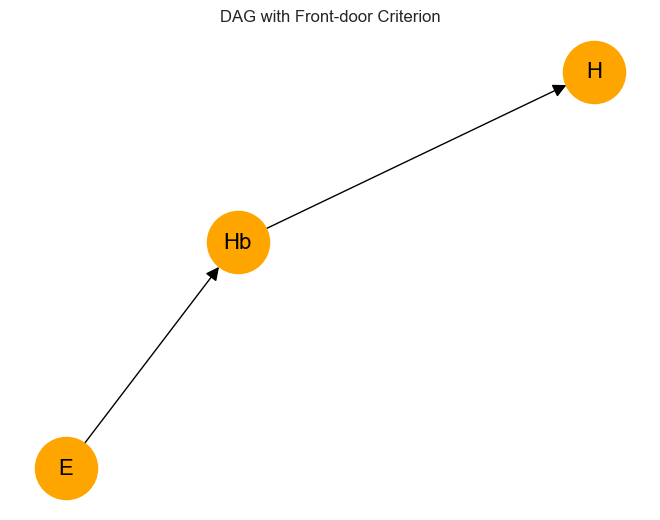

In [26]:
# Creating a directed graph for front-door criterion
G_frontdoor = nx.DiGraph()

# Adding nodes
G_frontdoor.add_nodes_from(['E', 'Hb', 'H'])

# Adding edges
G_frontdoor.add_edge('E', 'Hb')
G_frontdoor.add_edge('Hb', 'H')

# Drawing the graph
nx.draw(G_frontdoor, with_labels=True, node_color='orange', arrowsize=20, node_size=2000, font_size=16)
plt.title('DAG with Front-door Criterion')
plt.show()


### Instrumental Variables

An **instrumental variable** is used in causal inference to estimate causal relationships when controlled experiments are not feasible and there are unmeasured confounders. 

- **Definition**: An instrumental variable is a variable that affects the treatment but has no direct effect on the outcome except through the treatment.
- **Use Case**: Instrumental variables are valuable in situations where traditional adjustment for confounding is not possible or reliable.

**Example: Distance to Clinic (D) affects the likelihood of Receiving Treatment (T), which affects Health Outcome (H). D is an instrumental variable.**


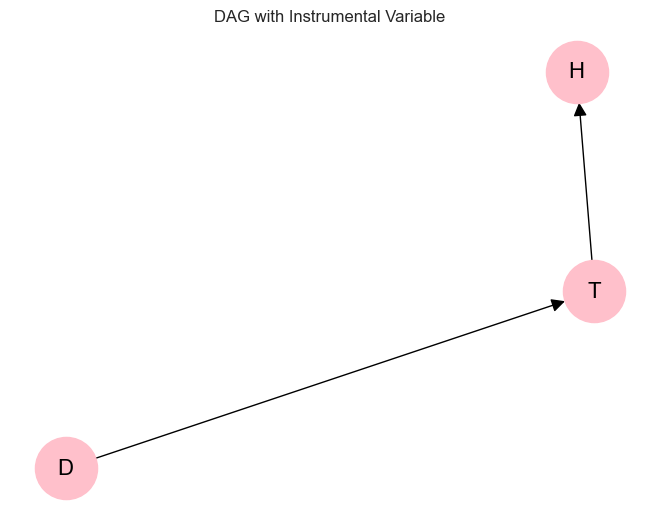

In [27]:
# Creating a directed graph for instrumental variables
G_iv = nx.DiGraph()

# Adding nodes
G_iv.add_nodes_from(['D', 'T', 'H'])

# Adding edges
G_iv.add_edge('D', 'T')
G_iv.add_edge('T', 'H')

# Drawing the graph
nx.draw(G_iv, with_labels=True, node_color='pink', arrowsize=20, node_size=2000, font_size=16)
plt.title('DAG with Instrumental Variable')
plt.show()


### Mediation Analysis

**Mediation analysis** explores how or why a certain effect occurs and involves decomposing the total effect of a treatment into direct and indirect (mediated) effects.

- **Components**: It involves understanding the mediator (a variable through which the treatment affects the outcome) and disentangling its effect from the total effect.
- **Relevance**: This analysis helps in understanding the underlying mechanism of the treatment effect.

**Example: Exercise (E) directly affects Heart Health (H) and also affects Stress Levels (S), which in turn affects H. S is a mediator.**



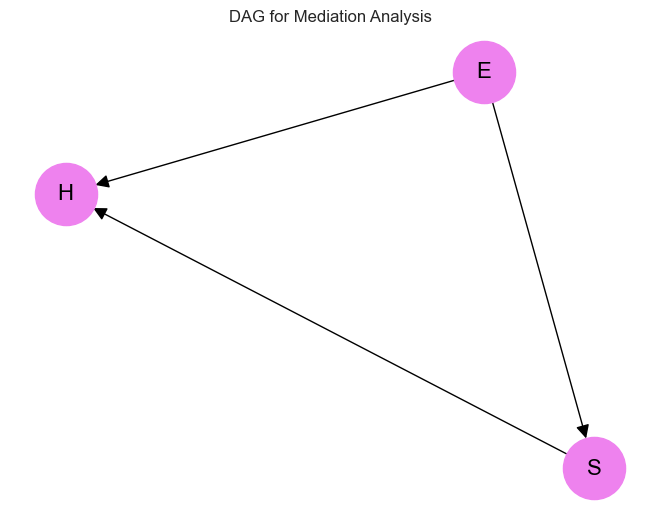

In [28]:
# Creating a directed graph for mediation analysis
G_mediation = nx.DiGraph()

# Adding nodes
G_mediation.add_nodes_from(['E', 'S', 'H'])

# Adding edges
G_mediation.add_edge('E', 'S')
G_mediation.add_edge('S', 'H')
G_mediation.add_edge('E', 'H')

# Drawing the graph
nx.draw(G_mediation, with_labels=True, node_color='violet', arrowsize=20, node_size=2000, font_size=16)
plt.title('DAG for Mediation Analysis')
plt.show()


---

Each of these concepts adds depth to our causal analysis, allowing for a more nuanced and accurate understanding of the causal structures within our data. By incorporating these advanced DAG concepts, we can approach causal questions with greater sophistication and robustness.

## Applying advanced DAGs concept to IHDP dataset

### Collider Variable in the IHDP dataset

First, let's assume we have identified a potential collider in the IHDP dataset. For the sake of this example, let's say Child's Birth Weight (B) and Mother's Education Level (M) both influence whether a child receives special care (treatment T), and Mother's Education Level also influences Family Income (F). Both the treatment and Family Income affect the child's cognitive outcome (C). In this case, Family Income is a collider.

**Step 1: Hypothetical Data Preparation**

Let's create some hypothetical columns in the IHDP dataset to represent these relationships. This step is just for illustration as we don't have the real dataset specifics.

In [29]:
import numpy as np

# Hypothetically creating the collider variable 'Family Income' and other related variables
np.random.seed(0)  # For reproducibility
ihdp_data['Mothers_Education_Level'] = np.random.choice([1, 2, 3], size=len(ihdp_data))  # 1=Low, 2=Medium, 3=High
ihdp_data['Family_Income'] = ihdp_data['Mothers_Education_Level'] + np.random.normal(0, 1, len(ihdp_data))  # Collider
ihdp_data['Childs_Birth_Weight'] = np.random.normal(3, 0.5, len(ihdp_data))  # In kg, just for illustration


**Step 2: Exploring the Collider**

We'll investigate the effect of conditioning on the collider (Family Income).

In [34]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Ensure 'treatment' is an integer
ihdp_data['treatment'] = ihdp_data['treatment'].astype(int)

# Check for any missing values and handle them if necessary
if ihdp_data[['treatment', 'y_factual', 'x1', 'x2', 'x3']].isnull().any().any():
    # Assuming we want to drop missing values; another strategy might be required based on the context
    ihdp_data = ihdp_data.dropna(subset=['treatment', 'y_factual', 'x1', 'x2', 'x3'])

# Run the regressions
# Assuming we have already created the 'Family_Income' and 'Childs_Birth_Weight' for the collider example
model_1 = sm.OLS(ihdp_data['y_factual'], sm.add_constant(ihdp_data[['treatment', 'x1', 'x2', 'x3']])).fit()
model_2 = sm.OLS(ihdp_data['y_factual'], sm.add_constant(ihdp_data[['treatment', 'x1', 'x2', 'x3', 'Family_Income']])).fit()

print("Model without controlling for collider:\n", model_1.summary())
print("\nModel with controlling for collider:\n", model_2.summary())






Model without controlling for collider:
                             OLS Regression Results                            
Dep. Variable:              y_factual   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.45e-115
Time:                        21:48:14   Log-Likelihood:                -1370.1
No. Observations:                 747   AIC:                             2750.
Df Residuals:                     742   BIC:                             2773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## Inference
### Coefficient (coef)

- **Treatment Coefficient:** This is the estimate of the average effect of the treatment on the outcome (y_factual). In both models, it's approximately 4.03. This number tells us that, according to the model, being in the treatment group is associated with an increase in the outcome variable by about 4.03 units compared to not being in the treatment group.

### P-value (P>|t|)

- **Treatment P-value:** Very low (essentially 0), suggesting that the treatment effect is statistically significant; the likelihood that the effect size observed is due to chance is very low.

### R-squared (R-squared)

- **R-squared:** It's 0.517 for both models, meaning that about 51.7% of the variation in the cognitive outcomes is explained by the treatment and covariates included in the model.

### F-statistic and Prob (F-statistic)

- **F-statistic:** Measures how well the model fits the data. A higher value indicates a better fit.
- **Prob (F-statistic):** Indicates the overall significance of the model. A low value suggests that the model is a better fit than an empty model.

### Standard Error (std err)

- **Treatment Standard Error:** It's about 0.144, which measures the average distance that the observed values fall from the regression line. The smaller the standard error, the more precise the estimate.

### 95% Confidence Interval ([0.025, 0.975])

- **Treatment Confidence Interval:** Ranges from approximately 3.748 to 4.314, indicating that we can be 95% confident that the true effect of the treatment lies within this interval.

### Comparison of Models: Collider Effect

- **Comparing Coefficients:** The coefficients for treatment in both models are almost identical, which suggests that in this case, controlling for Family_Income (the collider) did not introduce a noticeable bias in the estimate of the treatment effect.

### Additional Coefficient (Family_Income)

- In the second model, the coefficient for Family_Income is not statistically significant (p-value 0.671), which means that after controlling for other variables, Family_Income does not have a significant association with the outcome.

### Interpretation for Causal Inference

- From a causal inference perspective, the key takeaway is that the treatment appears to have a significant positive effect on the outcome, and this effect size is robust whether or not we adjust for the collider in this case. However, in practice, we should be cautious about controlling for colliders because it can open up paths of bias that confound the relationship between the treatment and the outcome.
---

### Back-door Criterion in the IHDP Dataset
The back-door criterion is a method for selecting a set of variables to adjust for in order to block back-door paths and thus eliminate confounding.

**Application Steps:**

1. Identify Back-door Paths: Look for paths in the DAG that start at the treatment, point backwards, and end at the outcome, going through confounders.
2. Choose Variables to Block Paths: Select variables that block all back-door paths without opening new ones via colliders.
3. Adjust for Selected Variables: Use statistical methods to adjust for these variables when estimating the causal effect.

Hypothesis for IHDP: Let’s assume that based on prior knowledge or previous analysis, we’ve identified variables x1, x2, and x3 as confounders that affect both the treatment (participation in the program) and the outcome (cognitive test scores).

Here is how you could approach this analysis using regression, which is one method to control for these confounders:

In [35]:
# Using statsmodels to run a regression that adjusts for confounders

# Assuming 'treatment' is a binary variable indicating treatment assignment,
# and 'y_factual' is the outcome variable.

# Construct a model that includes the potential confounders x1, x2, and x3.
model_backdoor = sm.OLS(ihdp_data['y_factual'], 
                        sm.add_constant(ihdp_data[['treatment', 'x1', 'x2', 'x3']])).fit()

# View the regression results
print(model_backdoor.summary())

                            OLS Regression Results                            
Dep. Variable:              y_factual   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.45e-115
Time:                        22:04:07   Log-Likelihood:                -1370.1
No. Observations:                 747   AIC:                             2750.
Df Residuals:                     742   BIC:                             2773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4097      0.062     39.033      0.0

### Coefficient for Treatment

- The coefficient is approximately 4.03, implying that, on average, receiving the treatment is associated with an increase in the outcome variable by about 4.03 units. This effect is after adjusting for the variables x1, x2, and x3, which we have considered potential confounders.

### P-value for Treatment

- With a p-value of 0.000, the treatment effect is statistically significant, suggesting that the association observed is unlikely to be due to random chance.

### R-squared

- The R-squared value is 0.517, meaning that around 51.7% of the variability in the cognitive test scores (y_factual) can be explained by the model. This indicates a moderate to strong fit of the model.

### Coefficients for Confounders (x1, x2, x3)

- None of the confounders have statistically significant coefficients (all p-values are above 0.05), which in this context means they do not have a significant individual association with the outcome after controlling for other factors. However, they may still be important as part of the adjustment set to control for confounding.

### F-statistic

- The F-statistic is high (198.2) and the probability of the F-statistic is very low (close to 0), indicating that the model as a whole is statistically significant. This means the covariates together significantly predict the outcome variable.

### Model Fit

- The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values give us information about the model fit, with lower values generally indicating a better fit. However, without another model for comparison, these are more difficult to interpret in isolation.

### Durbin-Watson

- The Durbin-Watson statistic is close to 2 (1.977), suggesting there is no significant autocorrelation in the residuals of the model.

### Omnibus/Prob(Omnibus)

- A test for the skewness and kurtosis of the residual. We have a significant Omnibus test, which along with a significant Jarque-Bera test, suggests that the residuals are not normally distributed.

### Skewness and Kurtosis

- The data shows some skewness and a high kurtosis. This could affect the reliability of the coefficient estimates, as OLS assumes normality of errors.

### Causal Inference Implication

With a statistically significant treatment effect and having adjusted for confounders via the back-door criterion, we might infer a causal relationship between the treatment and the outcome. However, caution should be exercised due to potential issues with residual normality (as suggested by the Omnibus and Jarque-Bera tests). Further diagnostics and perhaps robust regression techniques might be warranted to confirm these results.

---

### Instrumental Variables in the IHDP dataset:

Concept:

- An IV should be associated with the treatment (relevance).
- An IV should not be related to the outcome except through the treatment (exclusion restriction).
- An IV should not share common causes with the outcome (independence).

To apply the concept of IVs to the IHDP dataset, we would first need to identify a suitable instrument. Let's say we have a variable that measures "Distance to the nearest healthcare facility" and we hypothesize that:

Parents who live closer to the facility are more likely to participate in the IHDP because of easier access (relevance).
Distance to the facility doesn't affect the child's cognitive outcomes directly (exclusion restriction).
Distance is randomly determined and not related to other factors that directly affect cognitive outcomes (independence).
Analysis:
The typical analysis method for IVs is two-stage least squares (2SLS). In the first stage, you regress the treatment on the instrument. In the second stage, you regress the outcome on the predicted treatment from the first stage.

Here is how you might set up such an analysis, assuming Distance is our instrument:

In [37]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Assuming 'Distance' is our instrument and already created in the DataFrame ihdp_data

# The endogenous variable is treatment, exogenous variable is a constant,
# and the instrument is Distance
iv_model = IV2SLS(endog=ihdp_data['treatment'], exog=sm.add_constant(ihdp_data[['x1', 'x2', 'x3']]), instrument=ihdp_data['Distance']).fit()

# Now we run the regression of the outcome on the predicted treatment
iv_results = iv_model.predict()

# We regress the outcome on the fitted values from the first stage
result_iv = sm.OLS(ihdp_data['y_factual'], sm.add_constant(iv_results)).fit()

print(result_iv.summary())



                            OLS Regression Results                            
Dep. Variable:              y_factual   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.127
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.289
Time:                        22:17:59   Log-Likelihood:                -1641.0
No. Observations:                 747   AIC:                             3286.
Df Residuals:                     745   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1614      0.080     39.630      0.0


### Coefficient for x1

- The coefficient for x1 is approximately 0.0003, which is very small and suggests that x1 has a negligible effect on the outcome y_factual. This could be due to scaling or simply that x1 has no meaningful relationship with the outcome in this model.

### P-value for x1

- With a p-value of 0.289, this effect is not statistically significant, meaning there is no evidence to suggest x1 has a significant impact on the outcome.

### R-squared

- The R-squared value is very low (0.002), indicating that the model explains almost none of the variability in the outcome. This implies that the variables included in the model do not have much predictive power regarding y_factual.

### F-statistic and Prob (F-statistic)

- The F-statistic is quite low (1.127), and the probability of the F-statistic is not significant (0.289). This suggests that the model, as a whole, is not a good fit for the data.

### Omnibus/Prob(Omnibus)

- The Omnibus test is significant, indicating that the residuals of the model are not normally distributed. This is further supported by the significant Jarque-Bera test. Non-normality of the residuals violates one of the OLS assumptions, which can lead to unreliable coefficient estimates.

---

## Noncausal Arrows in Causal DAGs

In practical applications of causal inference, especially in complex settings like health and social sciences, it's common to encounter DAGs with arrows that do not have a well-defined causal interpretation. These are referred to as "noncausal" arrows, and their presence in DAGs presents unique challenges and considerations.

### Understanding "Noncausal" Arrows

"Noncausal" arrows in a DAG do not represent well-defined interventions. Instead, they often reflect recognized associations or correlations in the data. These arrows can still be useful for encoding conditional independencies via d-separation and guiding data analysis, but they lack a direct causal interpretation.

### Implications for Causal Inference

1. **Interpreting Noncausal Arrows**: While these arrows can guide the analysis of data, they should not be interpreted causally. Their primary role is to indicate observed associations.
2. **Challenges with Noncausal DAGs**: Relying on DAGs with noncausal arrows without recognizing their limitations can lead to misinterpretation of causal effects. It's crucial to be aware of which arrows in a DAG represent causal relationships and which do not.
3. **Utility in Complex Settings**: In complex research settings, noncausal arrows might be the only feasible option due to limitations in expert knowledge or data. They allow researchers to represent their current understanding of the relationships between variables, even if some of these relationships are not strictly causal.



### Hypothetical Example of a DAG with Noncausal Arrows

### Scenario:

Imagine we're studying factors that influence student performance in school. Our variables are:

- **Parental Education (PE):** The education level of the student's parents.
- **Student's Study Time (SST):** The amount of time a student spends studying.
- **Student's Performance (SP):** The academic performance of the student.
- **Student's Leisure Time (SLT):** The amount of leisure time a student has.
- **Family Income (FI):** The income level of the student's family.

We hypothesize that Parental Education influences both Family Income and Student's Study Time, Family Income influences Student's Leisure Time, and both Student's Study Time and Student's Leisure Time influence Student's Performance. However, we are unsure if the influence of Family Income on Student's Leisure Time is causal or just an association.


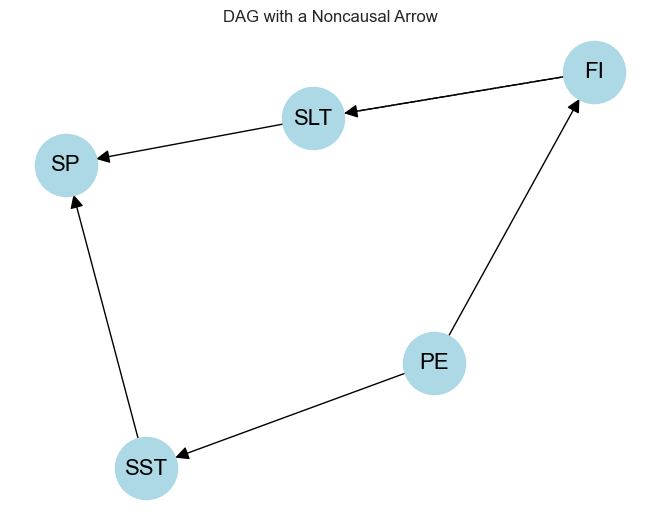

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating the DAG
G = nx.DiGraph()

# Adding nodes (variables)
G.add_nodes_from(['PE', 'SST', 'SP', 'SLT', 'FI'])

# Adding causal edges
G.add_edge('PE', 'SST')
G.add_edge('PE', 'FI')
G.add_edge('SST', 'SP')
G.add_edge('SLT', 'SP')

# Adding a noncausal edge (represented with a dashed line)
G.add_edge('FI', 'SLT', style='dashed')

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowsize=20, font_size=16)

# Drawing a dashed line for the noncausal edge
nx.draw_networkx_edges(G, pos, edgelist=[('FI', 'SLT')], style='dashed')

plt.title('DAG with a Noncausal Arrow')
plt.show()


In this DAG, the edge from Family Income (FI) to Student's Leisure Time (SLT) is represented as a dashed line, indicating it's a noncausal relationship. This distinction helps in interpreting the diagram correctly, understanding that while there may be an association between FI and SLT, we do not claim a direct causal effect based on the available data.

### Applying to the IHDP Dataset:

Now, let's consider applying this concept to the IHDP dataset. We might identify a variable whose relationship to others in the dataset is observed and statistically significant but where the direction of causation, or even if there is causation, is not clearly established or understood.

For example, if there's a variable in the IHDP dataset representing Community Support (CS), and we find it's associated with both treatment and y_factual, but we're not sure if Community Support causally influences these variables or is just correlated with them, we would represent these relationships with noncausal arrows in the DAG.

This approach would be reflected in the construction and interpretation of the DAG for the IHDP analysis, acknowledging the presence of relationships that are associative but not necessarily causal.


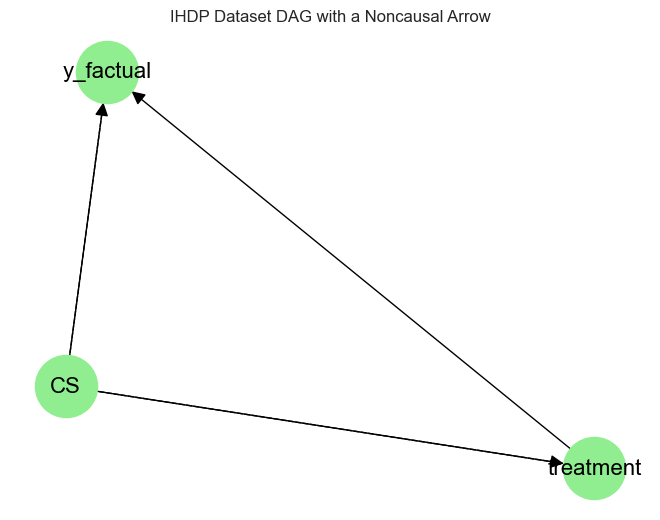

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G_ihdp = nx.DiGraph()

# Add nodes - treatment, outcome, and community support
G_ihdp.add_node('treatment')
G_ihdp.add_node('y_factual')
G_ihdp.add_node('CS')  # Community Support

# Add causal edges
G_ihdp.add_edge('treatment', 'y_factual')

# Add a noncausal edge (Community Support to treatment and outcome)
G_ihdp.add_edge('CS', 'treatment', style='dashed')
G_ihdp.add_edge('CS', 'y_factual', style='dashed')

# Draw the graph
pos = nx.spring_layout(G_ihdp)
nx.draw(G_ihdp, pos, with_labels=True, node_color='lightgreen', node_size=2000, arrowsize=20, font_size=16)

# Drawing dashed lines for noncausal edges
nx.draw_networkx_edges(G_ihdp, pos, edgelist=[('CS', 'treatment'), ('CS', 'y_factual')], style='dashed')

plt.title('IHDP Dataset DAG with a Noncausal Arrow')
plt.show()


## Estimation of Causal Effects

Once causal relationships have been identified and a causal model has been specified using Directed Acyclic Graphs (DAGs), the next step is to estimate the magnitude of these effects. This process allows us to understand not only whether a particular relationship is causal but also how strong that causal effect is.

### Concepts and Techniques for Causal Effect Estimation

Estimating causal effects requires careful consideration of the underlying assumptions and appropriate statistical techniques. Here are some of the key concepts and methods used in causal effect estimation:

- **Adjustment for Confounders**: Using regression models or stratification to control for confounding variables identified through DAGs.
  
- **Propensity Score Matching**: Matching individuals who received the treatment with similar individuals who did not based on their propensity scores to estimate causal effects.
  
- **Inverse Probability Weighting (IPW)**: Weighting individuals by the inverse probability of receiving the treatment they did receive to create a "pseudo-population" where the treatment is independent of the confounders.
  
- **Doubly Robust Estimation**: Combining modeling of the outcome with IPW to provide an estimate that is robust if either the outcome model or the propensity score model is correctly specified.

### Implementing Causal Effect Estimation

We'll walk through the implementation of these techniques using Python, utilizing libraries such as `statsmodels` and `scikit-learn`.

#### Adjustment for Confounders

Adjusting for confounders is often done through multiple regression, where the outcome variable is regressed on both the treatment variable and the confounding variables.



In [38]:
# Assuming ihdp_data is our DataFrame, 'treatment' is our binary treatment variable,
# 'y_factual' is our outcome variable, and 'x1', 'x2', 'x3' are our confounders:

import statsmodels.api as sm

# Construct the regression model
model = sm.OLS(ihdp_data['y_factual'], sm.add_constant(ihdp_data[['treatment', 'x1', 'x2', 'x3']])).fit()

# Print out the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              y_factual   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.45e-115
Time:                        22:44:35   Log-Likelihood:                -1370.1
No. Observations:                 747   AIC:                             2750.
Df Residuals:                     742   BIC:                             2773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4097      0.062     39.033      0.0

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Estimate propensity scores
logit = LogisticRegression()
X = ihdp_data[['x1', 'x2', 'x3']]
y = ihdp_data['treatment']
logit.fit(X, y)
ihdp_data['propensity_score'] = logit.predict_proba(X)[:, 1]

# Conduct matching
treated = ihdp_data[ihdp_data['treatment'] == 1]
untreated = ihdp_data[ihdp_data['treatment'] == 0]
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(untreated[['propensity_score']])
_, indices = nn.kneighbors(treated[['propensity_score']])
matched = untreated.iloc[indices.flatten()]

# Compare outcomes
treated_outcome = treated['y_factual'].mean()
matched_outcome = matched['y_factual'].mean()
ate = treated_outcome - matched_outcome
print(f"Estimated Average Treatment Effect: {ate}")


Estimated Average Treatment Effect: 4.101293331462763


The Estimated Average Treatment Effect (ATE) obtained from your propensity score matching analysis is approximately 4.1013. Here's what this result signifies:

Treatment Effect Size: The analysis suggests that on average, the treatment (or intervention) administered in the IHDP dataset is associated with an increase of approximately 4.1013 units in the cognitive test scores (assuming y_factual represents such scores).

Statistical Interpretation: This estimate represents the average difference in outcomes between the group that received the treatment and a matched control group that did not receive the treatment but had similar observed characteristics (as captured by the propensity scores). The matching process aims to approximate a randomized controlled trial by making the treatment and control groups as similar as possible in terms of the observed covariates.

Causal Inference Implication: If the propensity score matching was successful and all relevant confounders were included in the propensity score model, this estimate can be interpreted as a causal effect of the treatment on the outcome.

**Practical Meaning: The magnitude of the ATE (over 4 units) needs to be interpreted in the context of the measurement scale of the outcome. If the cognitive test scores are typically in a range of, say, 0 to 100, a 4-unit increase could be quite meaningful. However, if the scale is different, the practical significance of the ATE might change.**

---

# Ethics and Causality

As we approach the end of our exploration of causality and Directed Acyclic Graphs (DAGs), it is essential to address the ethical implications of causal analysis. Ethical considerations come into play from the design of a study to the interpretation and application of its findings. The power to establish causality carries with it the responsibility to ensure accuracy, honesty, and integrity in research.

In this section, we will discuss the ethical dimensions of causal research, including the responsibility of the researcher, the impact of causal claims on society, and the importance of ethical standards in research conduct.

### Responsibility in Causal Claims

Causal claims have the potential to influence policy, economic decisions, and individual behaviors. With such influence comes the responsibility to:

- **Ensure Rigorous Testing**: Causal models should be subjected to rigorous testing and validation to minimize the risk of incorrect conclusions.
- **Acknowledge Uncertainties**: Researchers should openly acknowledge uncertainties and limitations in their models.
- **Prevent Misuse**: Caution must be taken to prevent the misuse or misinterpretation of causal findings, particularly in sensitive areas such as public health or social policy.

### Transparency and Replicability

Transparency in the methods and data used to establish causality is crucial for:

- **Replicability**: Enabling other researchers to replicate findings is a cornerstone of scientific integrity.
- **Trust**: Full disclosure of methods and assumptions builds trust in the research and its conclusions.

### Ethical Use of Data

In the era of big data, respecting the privacy and rights of individuals whose data may be used in causal research is more important than ever:

- **Informed Consent**: Whenever possible, informed consent should be obtained before using data for research.
- **Data Protection**: Sensitive data should be handled with the utmost care, protecting against unauthorized access and potential harm to individuals.

---

## Target Trial Conceptualization in Causal Inference
The concept of a 'Target Trial' is a powerful approach in causal inference, particularly when working with observational data. It involves framing the analysis as if one is trying to emulate a randomized controlled trial (RCT), the gold standard for causal inference. This conceptualization aids in defining the causal question more clearly and choosing the appropriate method for analysis.

### What is a Target Trial?

A target trial is a hypothetical or idealized version of a randomized trial that we would conduct to answer a specific causal question. When actual RCTs are not feasible due to ethical, practical, or financial constraints, researchers can use observational data to emulate the target trial as closely as possible.

### Key Components of a Target Trial

1. **Clear Definition of Interventions**: Specifying the intervention (treatment) and comparison (control) conditions clearly.
2. **Eligibility Criteria**: Defining who would be included in the trial.
3. **Assignment Strategy**: Describing how participants would be allocated to treatment and control groups.
4. **Follow-up Period**: Specifying the duration of observation for outcomes.
5. **Outcome Assessment**: Clarifying how and when the outcomes will be measured.

### Application to the IHDP Dataset

Let's apply the target trial framework to the IHDP dataset:

- **Intervention**: The treatment in the IHDP dataset can be defined as participation in the early childhood intervention program.
- **Comparison**: The control condition would be non-participation in the program.
- **Eligibility Criteria**: All children in the dataset are eligible.
- **Assignment Strategy**: While the actual IHDP dataset stems from an RCT, for observational analysis, we assume a hypothetical random assignment or model it using propensity scores.
- **Follow-up Period**: This would be the duration over which children's cognitive outcomes were measured post-intervention.
- **Outcome Assessment**: Cognitive test scores at specific follow-up times would serve as the outcome.

By conceptualizing the IHDP dataset in the framework of a target trial, we gain clarity on how to structure our causal analysis. It guides the selection of appropriate statistical techniques and provides a structured approach to emulate the conditions of an RCT, thereby strengthening the causal inferences drawn from the observational data.

---

## Ethical Consideration in Interventions

When conducting causal inference, especially in fields that directly impact human lives, ethical considerations surrounding interventions are paramount. This entails not just identifying and understanding the causal effects of interventions but also considering the ethical implications and practicality of these interventions.

### Understanding the Role of Interventions

In causal inference, an intervention refers to any action, treatment, or change in policy whose effects we are interested in evaluating. While the statistical aspects of identifying causal effects are crucial, it's equally important to consider the ethical context of these interventions.

### Key Ethical Considerations

1. **Realism of Interventions**: Are the interventions being studied practical and realistic? Hypothetical interventions might lead to misleading conclusions or impractical policy recommendations.

2. **Informed Consent**: In studies involving human subjects, especially in healthcare or social policy, it's vital to ensure that participants give informed consent, understanding the nature and potential impact of the intervention.

3. **Potential Harm**: Ethical analysis must consider whether an intervention could potentially harm participants, directly or indirectly, and weigh this against the potential benefits.

4. **Fairness and Equity**: Interventions should be evaluated not just for their overall effectiveness but also for their impact across different groups, ensuring they don't perpetuate or exacerbate inequalities.

### Application to the IHDP Dataset

In the context of the IHDP dataset:

- **Realism**: The intervention, which involves an early childhood development program, is practical and addresses a real-world issue.
  
- **Informed Consent**: While the actual IHDP study would have needed informed consent, in secondary data analysis, researchers should still be aware of the origins of the data and the consent provided.

- **Potential Harm**: The intervention is aimed at improving outcomes for premature infants, a vulnerable population. Ethical considerations include ensuring that the intervention doesn't inadvertently cause harm or stress to the children or their families.

- **Fairness and Equity**: Analyzing the data with a lens of equity involves checking if the benefits of the intervention were equitably distributed across various subgroups, such as different socio-economic or ethnic backgrounds.

By applying these ethical considerations to interventions in causal studies, researchers can ensure that their work is not only methodologically sound but also ethically responsible. It helps in steering the research towards interventions that are not only effective but also equitable and beneficial for all involved parties.

---
Throughout this crash course, we've embarked on a journey through the intricate and fascinating world of causal inference, guided by the principles outlined in the seminal textbook "Causal Inference." We delved into the foundational concepts of Directed Acyclic Graphs (DAGs), explored advanced topics like instrumental variables and mediation analysis, and tackled the ethical dimensions inherent in this field. By applying these concepts to the IHDP dataset, we not only illustrated theoretical ideas but also grappled with practical challenges, highlighting the importance of careful consideration in methodology and interpretation. This course underscored the critical nature of causality in understanding and influencing the world around us, reminding us that beyond the rigor of statistical analysis lies a realm of ethical responsibility. As we close this notebook, let's carry forward the lesson that causal inference is not just a statistical tool but a powerful means to uncover truths, inform policies, and ultimately, make a positive impact on society.

## Thank you

### References
https://github.com/AMLab-Amsterdam/CEVAE/tree/master

https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/

https://www.coursera.org/learn/crash-course-in-causality/home/week/1

https://paperswithcode.com/paper/learning-end-to-end-patient-representations

https://www.youtube.com/watch?v=hvK0VIX8kxE [DAGs]


---


MIT License

Copyright (c) 2024 Divyesh Singh Rajput

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.